<a href="https://colab.research.google.com/github/venkatesh-manikumar/Datascience-Assignments/blob/main/Data_preprocessing_19_Jul_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,OrdinalEncoder,LabelBinarizer,LabelEncoder,MultiLabelBinarizer

In [162]:
data = pd.read_csv('/content/drive/MyDrive/DataScience/student_assignment.csv')
data.shape

(104, 6)

In [163]:
# Works only on numerical columns
data.describe()

,Age,Income,Num Children,Temperature,Rating
count,103.000000,104.000000,101.000000,104.000000,104.000000
mean,52.932039,58456.756442,3.059406,38.399038,3.295192
std,66.249567,22150.934058,4.046781,2.083010,1.448426
min,18.000000,20955.370000,0.000000,35.200000,-3.200000
25%,31.500000,40065.965000,2.000000,36.700000,2.600000
50%,42.000000,58014.560000,3.000000,38.400000,3.400000
75%,53.500000,74489.015000,4.000000,39.925000,4.100000
max,511.000000,99072.180000,40.000000,41.900000,10.900000


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [165]:
# Compute number of missing values
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [166]:
# Duplicate data check
data.duplicated().sum()


3

In [167]:
# Remvove duplicates
data = data.drop_duplicates()
data.duplicated().sum()

0

In [168]:
data.shape

(101, 6)

<Axes: >

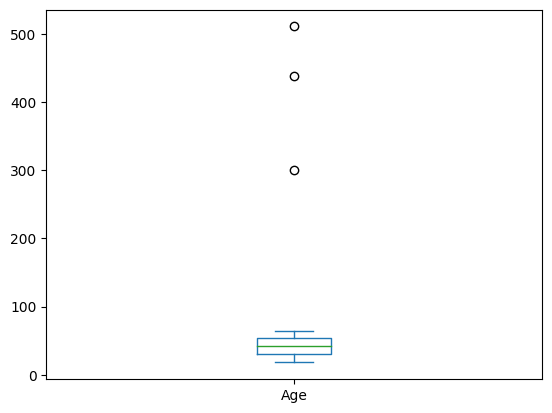

In [169]:
data['Age'].plot(kind='box')

<Axes: >

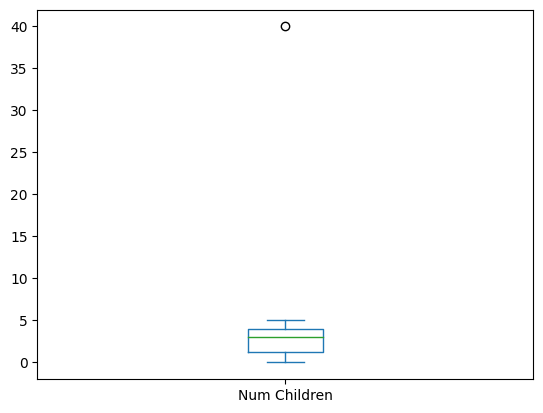

In [170]:
data['Num Children'].plot(kind='box')

In [171]:
# Handling missing values in Age & Num Children

data['Age'] = data['Age'].fillna(data['Age'].median())
data['Num Children'] = data['Num Children'].fillna(data['Num Children'].median())

In [172]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("LOWER BOUND = %3.2f  UPPER_BOUND= %3.2f" % (low,high))
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])


Age
LOWER BOUND = -3.50  UPPER_BOUND= 88.50
Outliers =  7     511.0
19    301.0
47    438.0
Name: Age, dtype: float64
Income
LOWER BOUND = -11430.63  UPPER_BOUND= 126309.53
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
LOWER BOUND = -1.00  UPPER_BOUND= 7.00
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
LOWER BOUND = 32.25  UPPER_BOUND= 44.65
Outliers =  Series([], Name: Temperature, dtype: float64)


In [173]:
# Removing outliers on Age and Num Children
data[data['Age'] > 100]
data = data[~(data['Age'] > 100)]

In [174]:
data['Num Children']>5
data = data[~(data['Num Children']>5)]

<Axes: >

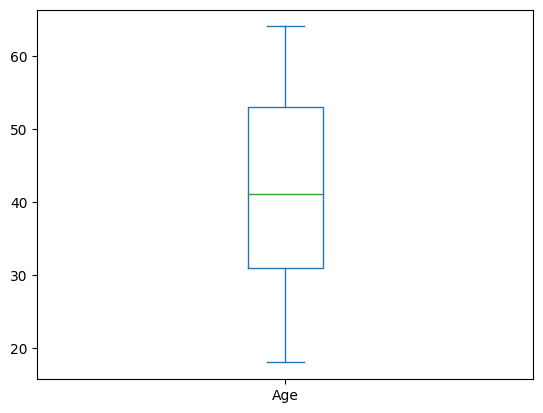

In [175]:
data['Age'].plot(kind='box')

<Axes: >

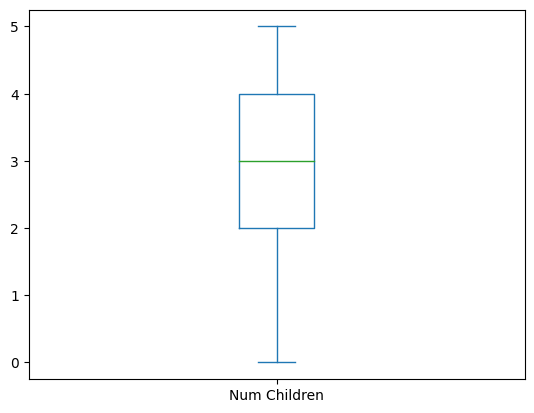

In [176]:
data['Num Children'].plot(kind='box')

In [180]:
# No Missing values
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64